In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [453]:
car_df = pd.read_csv('cardata.csv')
car_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [454]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [455]:
car_df = car_df.drop(columns=['Market Category', 'MSRP', 'Popularity'])

In [456]:
car_df = car_df.dropna()

In [457]:
car_df = car_df[car_df['Engine Fuel Type'] != 'electric']

In [458]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(car_df['Engine Fuel Type'].unique())
car_df['Engine Fuel Type'] = le.transform(car_df['Engine Fuel Type'])
le = LabelEncoder()
le.fit(car_df['Transmission Type'].unique())
car_df['Transmission Type'] = le.transform(car_df['Transmission Type'])
le = LabelEncoder()
le.fit(car_df.Driven_Wheels.unique())
car_df['Driven_Wheels'] = le.transform(car_df.Driven_Wheels)
le = LabelEncoder()
le.fit(car_df['Vehicle Size'].unique())
car_df['Vehicle Size'] = le.transform(car_df['Vehicle Size'])
le = LabelEncoder()
le.fit(car_df['Vehicle Style'].unique())
car_df['Vehicle Style'] = le.transform(car_df['Vehicle Style'])

In [459]:
car_df = car_df.set_index(['Make','Model', 'Year'])

In [460]:
car_df

Engine Fuel Type  Engine HP  Engine Cylinders  \
Make    Model      Year                                                  
BMW     1 Series M 2011                 6      335.0               6.0   
        1 Series   2011                 6      300.0               6.0   
                   2011                 6      300.0               6.0   
                   2011                 6      230.0               6.0   
                   2011                 6      230.0               6.0   
...                                   ...        ...               ...   
Acura   ZDX        2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2013                 5      300.0               6.0   
Lincoln Zephyr     2006                 7      221.0               6.0   

                         Transmission Type  Driven_Wheels  Number of Doors  \
Make    Model      Year                                                      
BMW     1 Series M 2011                  3              3              2.0   
        1 Series   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
...                                    ...            ...              ...   
Acura   ZDX        2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2013                  1              0              4.0   
Lincoln Zephyr     2006                  1              2              4.0   

                         Vehicle Size  Vehicle Style  highway MPG  city mpg  
Make    Model      Year                                                      
BMW     1 Series M 2011             0              8           26        19  
        1 Series   2011             0              6           28        19  
                   2011             0              8           28        20  
                   2011             0              8           28        18  
                   2011             0              6           28        18  
...                               ...            ...          ...       ...  
Acura   ZDX        2012             2              2           23        16  
                   2012             2              2           23        16  
                   2012             2              2           23        16  
                   2013             2              2           23        16  
Lincoln Zephyr     2006             2             14           26        17  

[11799 rows x 10 columns]

In [461]:
car_df['Average MPG'] = (car_df['highway MPG'] + car_df['city mpg'])/2

In [462]:
car_df

Engine Fuel Type  Engine HP  Engine Cylinders  \
Make    Model      Year                                                  
BMW     1 Series M 2011                 6      335.0               6.0   
        1 Series   2011                 6      300.0               6.0   
                   2011                 6      300.0               6.0   
                   2011                 6      230.0               6.0   
                   2011                 6      230.0               6.0   
...                                   ...        ...               ...   
Acura   ZDX        2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2013                 5      300.0               6.0   
Lincoln Zephyr     2006                 7      221.0               6.0   

                         Transmission Type  Driven_Wheels  Number of Doors  \
Make    Model      Year                                                      
BMW     1 Series M 2011                  3              3              2.0   
        1 Series   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
...                                    ...            ...              ...   
Acura   ZDX        2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2013                  1              0              4.0   
Lincoln Zephyr     2006                  1              2              4.0   

                         Vehicle Size  Vehicle Style  highway MPG  city mpg  \
Make    Model      Year                                                       
BMW     1 Series M 2011             0              8           26        19   
        1 Series   2011             0              6           28        19   
                   2011             0              8           28        20   
                   2011             0              8           28        18   
                   2011             0              6           28        18   
...                               ...            ...          ...       ...   
Acura   ZDX        2012             2              2           23        16   
                   2012             2              2           23        16   
                   2012             2              2           23        16   
                   2013             2              2           23        16   
Lincoln Zephyr     2006             2             14           26        17   

                         Average MPG  
Make    Model      Year               
BMW     1 Series M 2011         22.5  
        1 Series   2011         23.5  
                   2011         24.0  
                   2011         23.0  
                   2011         23.0  
...                              ...  
Acura   ZDX        2012         19.5  
                   2012         19.5  
                   2012         19.5  
                   2013         19.5  
Lincoln Zephyr     2006         21.5  

[11799 rows x 11 columns]

In [463]:
caruse_df = car_df

In [464]:
from sklearn.decomposition import TruncatedSVD 
 
matrix_dense = caruse_df.to_numpy()
caruse_df

Engine Fuel Type  Engine HP  Engine Cylinders  \
Make    Model      Year                                                  
BMW     1 Series M 2011                 6      335.0               6.0   
        1 Series   2011                 6      300.0               6.0   
                   2011                 6      300.0               6.0   
                   2011                 6      230.0               6.0   
                   2011                 6      230.0               6.0   
...                                   ...        ...               ...   
Acura   ZDX        2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2012                 6      300.0               6.0   
                   2013                 5      300.0               6.0   
Lincoln Zephyr     2006                 7      221.0               6.0   

                         Transmission Type  Driven_Wheels  Number of Doors  \
Make    Model      Year                                                      
BMW     1 Series M 2011                  3              3              2.0   
        1 Series   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
                   2011                  3              3              2.0   
...                                    ...            ...              ...   
Acura   ZDX        2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2012                  1              0              4.0   
                   2013                  1              0              4.0   
Lincoln Zephyr     2006                  1              2              4.0   

                         Vehicle Size  Vehicle Style  highway MPG  city mpg  \
Make    Model      Year                                                       
BMW     1 Series M 2011             0              8           26        19   
        1 Series   2011             0              6           28        19   
                   2011             0              8           28        20   
                   2011             0              8           28        18   
                   2011             0              6           28        18   
...                               ...            ...          ...       ...   
Acura   ZDX        2012             2              2           23        16   
                   2012             2              2           23        16   
                   2012             2              2           23        16   
                   2013             2              2           23        16   
Lincoln Zephyr     2006             2             14           26        17   

                         Average MPG  
Make    Model      Year               
BMW     1 Series M 2011         22.5  
        1 Series   2011         23.5  
                   2011         24.0  
                   2011         23.0  
                   2011         23.0  
...                              ...  
Acura   ZDX        2012         19.5  
                   2012         19.5  
                   2012         19.5  
                   2013         19.5  
Lincoln Zephyr     2006         21.5  

[11799 rows x 11 columns]

In [465]:
svd = TruncatedSVD(n_components=2)

In [466]:
svd.fit(matrix_dense)

TruncatedSVD()

In [467]:
matrix_reduced = svd.transform(matrix_dense)

In [468]:
np.mean(matrix_reduced, axis=0)

array([252.91434854,  -8.17688593])

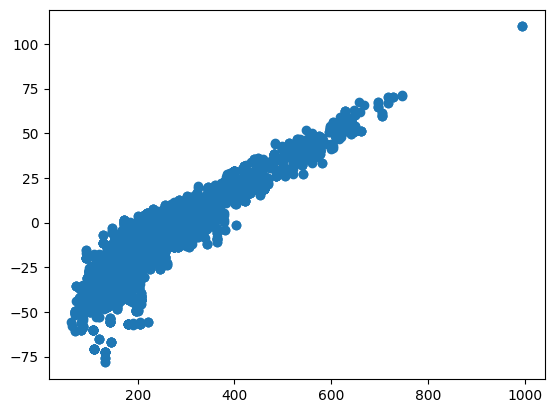

In [469]:
plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1])

In [470]:
k = 3
model = KMeans(n_clusters=k)
model.fit(matrix_dense)
caruse_df["cluster"] = model.labels_

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [471]:
test_df = car_df

In [486]:
k = 3
model = KMeans(n_clusters=k)
model.fit(car_df[['Engine HP', 'Average MPG']])
test_df["cluster"] = model.labels_

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Highway MPG')

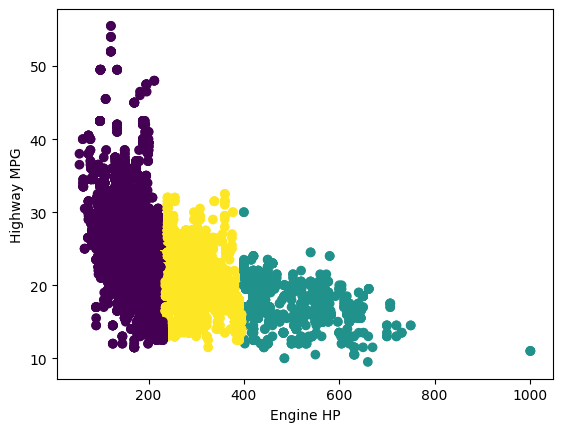

In [487]:
plt.scatter(test_df['Engine HP'], test_df['Average MPG'], c=caruse_df["cluster"])
plt.xlabel("Engine HP")
plt.ylabel("Highway MPG")

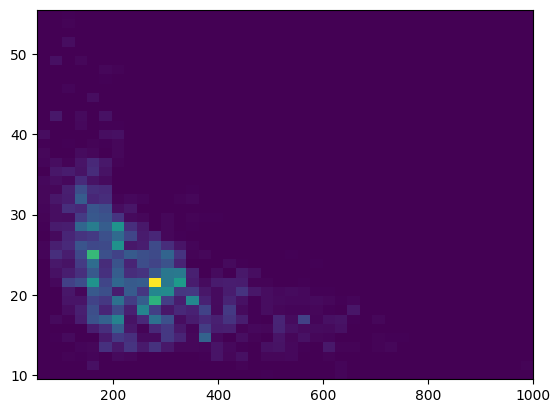

In [488]:
plt.hist2d(test_df['Engine HP'], test_df['Average MPG'], bins=40, cmap='viridis')
plt.show()

In [475]:
car_df[['cluster']]

cluster
Make    Model      Year         
BMW     1 Series M 2011        0
        1 Series   2011        0
                   2011        0
                   2011        1
                   2011        1
...                          ...
Acura   ZDX        2012        0
                   2012        0
                   2012        0
                   2013        0
Lincoln Zephyr     2006        1

[11799 rows x 1 columns]

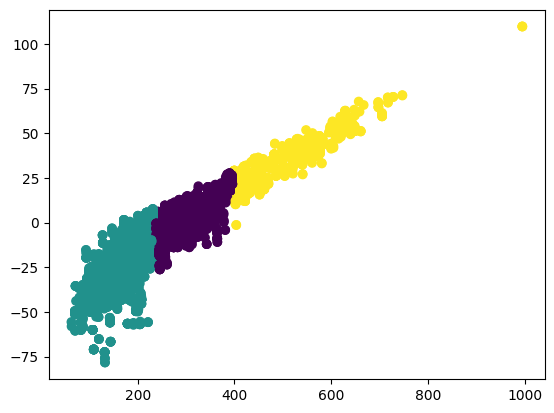

In [476]:
plt.scatter(matrix_reduced[:,0], matrix_reduced[:,1], c=caruse_df["cluster"])

In [477]:
model = KMeans(n_clusters=k)

model.fit(matrix_reduced)

C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [478]:
silhouette_score(matrix_reduced, model.labels_)

0.5982691803855017

In [479]:
random_labels = np.random.randint(0, k, matrix_reduced.shape[0])
silhouette_score(matrix_reduced, random_labels)

-0.006912944712283593

In [480]:
silhouette_scores = []
for test_k in range(2, 11, 1):
    print(test_k)
    
    tmp_model = KMeans(n_clusters=test_k)
    tmp_model.fit(matrix_reduced)
    
    score = silhouette_score(matrix_reduced, tmp_model.labels_)
    silhouette_scores.append((test_k, score))

2


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


C:\Users\Cole\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [481]:
silhouette_df = pd.DataFrame(silhouette_scores, columns=["k", "score"])
silhouette_df

,k,score
0,2,0.567131
1,3,0.598269
2,4,0.583242
3,5,0.515187
4,6,0.486574
5,7,0.481843
6,8,0.476583
7,9,0.469880
8,10,0.463483


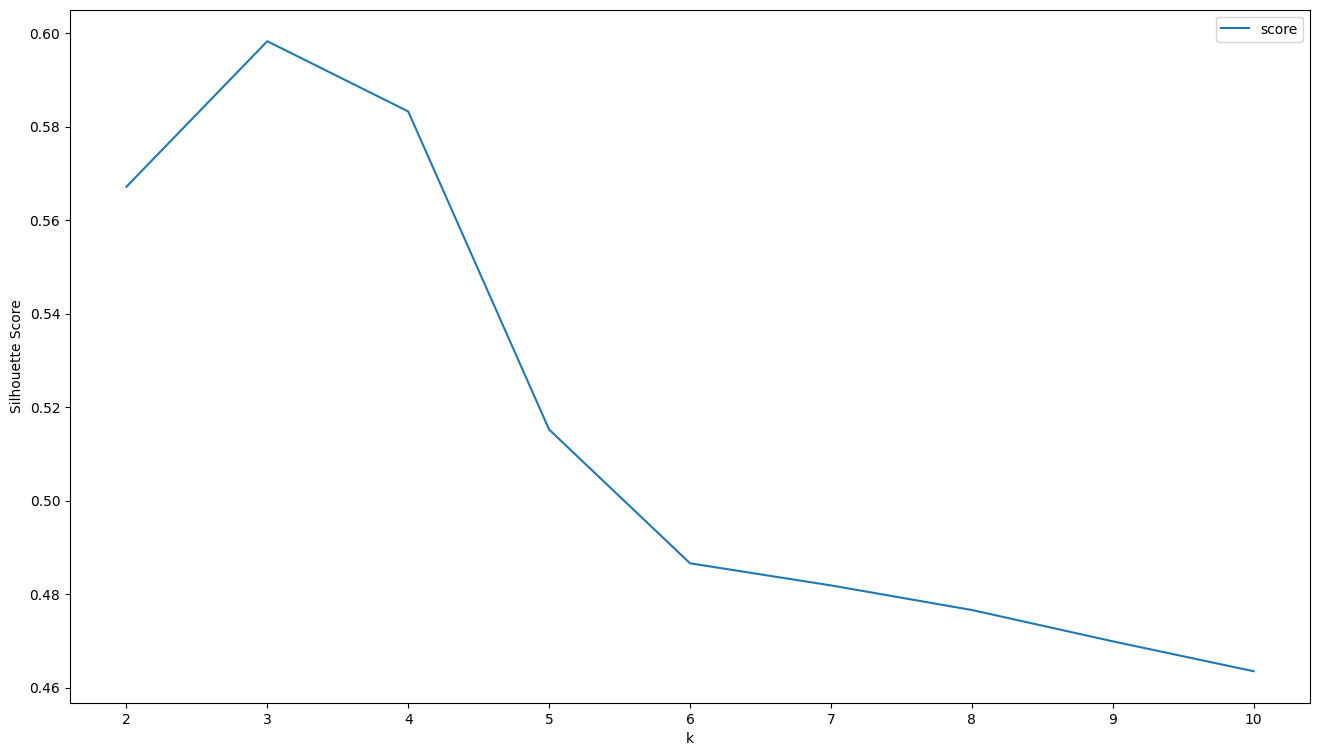

In [482]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)

silhouette_df.plot("k", "score", ax=ax)

ax.set_ylabel("Silhouette Score")

plt.show()